<a href="https://colab.research.google.com/github/nikhilgodalla/ObesityDataScience/blob/main/Auto_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Abstract
The dataset comprises estimations of obesity levels among individuals in Mexico, Peru, and Colombia, spanning ages from 14 to 61 and encompassing various dietary habits and physical conditions. Data collection was facilitated through a web platform, where anonymous respondents completed a survey. Subsequently, the gathered information underwent processing, resulting in 17 attributes and 2111 records.

The attributes pertaining to dietary habits include the frequency of consuming high-calorie foods (FAVC), vegetable consumption frequency (FCVC), number of main meals (NCP), consumption of snacks between meals (CAEC), daily water intake (CH20), and alcohol consumption (CALC). Attributes concerning physical condition encompass the monitoring of calorie intake (SCC), frequency of physical activity (FAF), time spent using technological devices (TUE), and mode of transportation used (MTRANS).

The variables obtained include gender, age, height, and weight. Obesity levels are categorized as follows:

Underweight: 1
Normal: 2
Overweight: 3
Obesity I:4
Obesity II: 5
Obesity III: 6
The dataset encompasses both numerical and continuous data, making it suitable for analysis for performing predicitions.

Link - https://www.kaggle.com/datasets/aravindpcoder/obesity-or-cvd-risk-classifyregressorcluster

# **Importing Libraries**


In [ ]:
## Installing all the required libraries for the assingment.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
from sklearn.model_selection import  train_test_split
from sklearn import metrics

# **Loading and Reading Dataset**

In [ ]:
null_values = ['-',np.nan]
data_set= pd.read_csv("https://raw.githubusercontent.com/nikhilgodalla/ObesityDataScience/main/ObesityDataSet.csv",na_values=null_values)


In [ ]:
data_set.head()

Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        Normal_Weight  
3                Walking   Overweight_Level_I  
4  Public_Transportation  Overweight_Level_II

In [ ]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [ ]:
## Check the missing values in the dataframe.
data_set.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

#AUTOML

In [ ]:
#Installing required packages
!pip3 install h2o

In [ ]:
#Importing required packages
import h2o
from h2o.automl import H2OAutoML

In [ ]:
## Initialize H20 JVM and H2O cluster im my local machine
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         4 hours 10 mins
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.44.0.3
H2O_cluster_version_age:    1 month and 30 days
H2O_cluster_name:           H2O_from_python_unknownUser_vulorj
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    2.864 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.10.12 final
--------------------------  -----------------------------------------------------------------------------------------

In [ ]:
if not isinstance(data_set, h2o.H2OFrame):
    data_set = h2o.H2OFrame(data_set)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
## Call summary of the dataset along with chunky summary
data_set.describe(chunk_summary=True)

Rows:2111
Cols:17

Chunk compression summary: 
chunk_type    chunk_name                 count    count_percentage    size     size_percentage
------------  -------------------------  -------  ------------------  -------  -----------------
CBS           Binary                     3        17.6471             1002  B  1.27849
CXI           Sparse Integers            2        11.7647             432  B   0.551203
C1N           1-Byte Integers (w/o NAs)  4        23.5294             8.5 KB   11.121
C4S           4-Byte Fractions           8        47.0588             66.6 KB  87.0493

Frame distribution summary: 
                 size     number_of_rows    number_of_chunks_per_column    number_of_chunks
---------------  -------  ----------------  -----------------------------  ------------------
127.0.0.1:54321  76.5 KB  2111              1                              17
mean             76.5 KB  2111              1                              17
min              76.5 KB  2111              1                              17
max              76.5 KB  2111              1                              17
stddev           0  B     0                 0                              0
total            76.5 KB  2111              1                              17

Gender    Age                 Height               Weight              family_history_with_overweight    FAVC    FCVC                NCP                 CAEC       SMOKE    CH2O                SCC    FAF                 TUE                 CALC        MTRANS                 NObeyesdad
-------  --------  ------------------  -------------------  ------------------  --------------------------------  ------  ------------------  ------------------  ---------  -------  ------------------  -----  ------------------  ------------------  ----------  ---------------------  -------------------
type     enum      real                real                 real                enum                              enum    real                real                enum       enum     real                enum   real                real                enum        enum                   enum
mins               14.0                1.45                 39.0                                                          1.0                 1.0                                     1.0                        0.0                 0.0
mean               24.312599908574136  1.7016773533870213   86.58605812648042                                             2.4190430615821894  2.6856280497394587                      2.0080114040739003         1.0102976958787335  0.657865923732829
maxs               61.0                1.98                 173.0                                                         3.0                 4.0                                     3.0                        3.0                 2.0
sigma              6.345968273732225   0.09330481986792012  26.191171745204706                                            0.5339265785032998  0.7780386488418612                      0.6129534517968718         0.8505924308366988  0.6089272596763785
zeros              0                   0                    0                                                             0                   0                                       0                          411                 557
missing  0         0                   0                    0                   0                                 0       0                   0                   0          0        0                   0      0                   0                   0           0                      0
0        Female    21.0                1.62                 64.0                yes                               no      2.0                 3.0                 Sometimes  no       2.0                 no     0.0                 1.0                 no          Public_Transportation  Normal_Weight
1        Female    21.0                1.52                 56.0                yes                               no      3.0                 3.0                 Sometimes  yes      3.0                 yes    3.0                 0.0                 Sometimes   Public_Transportation  Normal_Weight
2        Male      23.0                1.8                  77.0                yes                               no      2.0                 3.0                 Sometimes  no       2.0                 no     2.0                 1.0                 Frequently  Public_Transportation  Normal_Weight
3        Male      27.0                1.8                  87.0                no                                no      3.0                 3.0                 Sometimes  no       2.0                 no     2.0                 0.0                 Frequently  Walking                Overweight_Level_I
4        Male      22.0                1.78                 89.8                no                                no      2.0                 1.0                 Sometimes  no       2.0                 no     0.0                 0.0                 Sometimes   Public_Transportation  Overweight_Level_II
5        Male      29.0                1.62                 53.0                no                                yes     2.0               

In [ ]:
import h2o

# Convert H2OFrame to pandas DataFrame
data_set_df = data_set.as_data_frame()

# Define the ordinal mapping for 'NObeyesdad'
ordinal_mapping = {'Insufficient_Weight': 0, 'Normal_Weight': 1, 'Overweight_Level_I': 2, 'Overweight_Level_II': 3, 'Obesity_Type_I': 4, 'Obesity_Type_II': 5, 'Obesity_Type_III': 6}

# Apply label encoding with specified mapping
data_set_df['NObeyesdad'] = data_set_df['NObeyesdad'].map(ordinal_mapping)

# Perform label encoding for other categorical attributes using one-hot encoding
categorical_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']
data_set_df = pd.get_dummies(data_set_df, columns=categorical_cols, drop_first=True)

# Convert pandas DataFrame back to H2OFrame
data_set = h2o.H2OFrame(data_set_df)

# Display the encoded H2OFrame
data_set.head()


Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


Age    Height    Weight    FCVC    NCP    CH2O    FAF    TUE    NObeyesdad    Gender_Male    family_history_with_overweight_yes    FAVC_yes    CAEC_Frequently    CAEC_Sometimes    CAEC_no    SMOKE_yes    SCC_yes    CALC_Frequently    CALC_Sometimes    CALC_no    MTRANS_Bike    MTRANS_Motorbike    MTRANS_Public_Transportation    MTRANS_Walking
-----  --------  --------  ------  -----  ------  -----  -----  ------------  -------------  ------------------------------------  ----------  -----------------  ----------------  ---------  -----------  ---------  -----------------  ----------------  ---------  -------------  ------------------  ------------------------------  ----------------
   21      1.62      64         2      3       2      0      1             1              0                                     1           0                  0                 1          0            0          0                  0                 0          1              0                   0                               1                 0
   21      1.52      56         3      3       3      3      0             1              0                                     1           0                  0                 1          0            1          1                  0                 1          0              0                   0                               1                 0
   23      1.8       77         2      3       2      2      1             1              1                                     1           0                  0                 1          0            0          0                  1                 0          0              0                   0                               1                 0
   27      1.8       87         3      3       2      2      0             2              1                                     0           0                  0                 1          0            0          0                  1                 0          0              0                   0                               0                 1
   22      1.78      89.8       2      1       2      0      0             3              1                                     0           0                  0                 1          0            0          0                  0                 1          0              0                   0                               1                 0
   29      1.62      53         2      3       2      0      0             1              1                                     0           1                  0                 1          0            0          0                  0                 1          0              0                   0                               0                 0
   23      1.5       55         3      3       2      1      0             1              0                                     1           1                  0                 1          0            0          0                  0                 1          0              0                   1                               0                 0
   22      1.64      53         2      3       2      3      0             1              1                                     0           0                  0                 1          0            0          0                  0                 1          0              0                   0                               1                 0
   24      1.78      64         3      3       2      1      1             1              1                                     1           1                  0                 1          0            0          0                  1                 0          0              0                   0                               1                 0
   22      1.72      68         2      3       2      1      1             1              1                                     1           1                  0                 1       

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


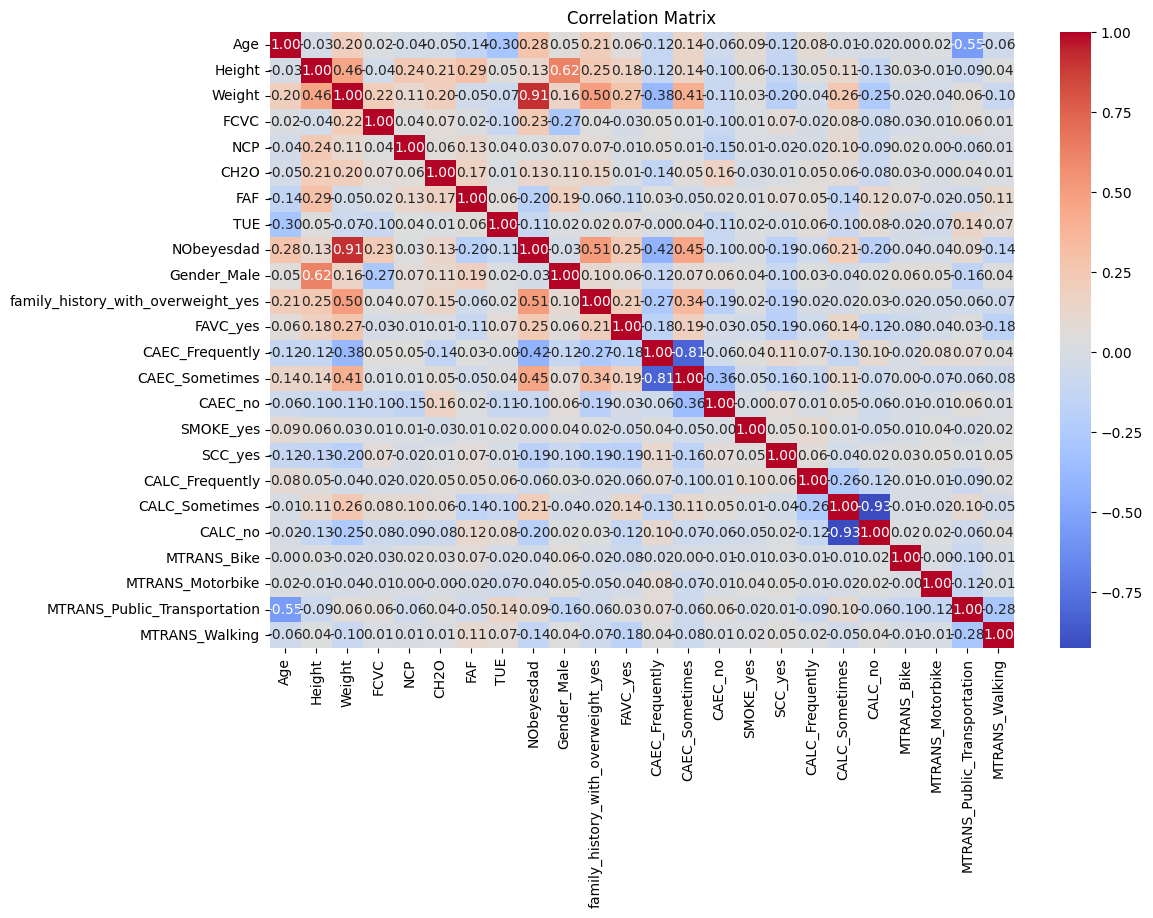

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert H2OFrame to pandas DataFrame
data_set_df = data_set.as_data_frame()

# Calculate correlation matrix
correlation_matrix = data_set_df.corr()

# Plot a heatmap to visualize correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [ ]:
## Split the dataset into traning and testing sets
train, test = data_set.split_frame(ratios=[0.7], seed=1)


In [ ]:
train.head()

Age    Height    Weight    FCVC    NCP    CH2O    FAF    TUE    NObeyesdad    Gender_Male    family_history_with_overweight_yes    FAVC_yes    CAEC_Frequently    CAEC_Sometimes    CAEC_no    SMOKE_yes    SCC_yes    CALC_Frequently    CALC_Sometimes    CALC_no    MTRANS_Bike    MTRANS_Motorbike    MTRANS_Public_Transportation    MTRANS_Walking
-----  --------  --------  ------  -----  ------  -----  -----  ------------  -------------  ------------------------------------  ----------  -----------------  ----------------  ---------  -----------  ---------  -----------------  ----------------  ---------  -------------  ------------------  ------------------------------  ----------------
   21      1.62        64       2      3       2      0      1             1              0                                     1           0                  0                 1          0            0          0                  0                 0          1              0                   0                               1                 0
   21      1.52        56       3      3       3      3      0             1              0                                     1           0                  0                 1          0            1          1                  0                 1          0              0                   0                               1                 0
   27      1.8         87       3      3       2      2      0             2              1                                     0           0                  0                 1          0            0          0                  1                 0          0              0                   0                               0                 1
   29      1.62        53       2      3       2      0      0             1              1                                     0           1                  0                 1          0            0          0                  0                 1          0              0                   0                               0                 0
   22      1.64        53       2      3       2      3      0             1              1                                     0           0                  0                 1          0            0          0                  0                 1          0              0                   0                               1                 0
   24      1.78        64       3      3       2      1      1             1              1                                     1           1                  0                 1          0            0          0                  1                 0          0              0                   0                               1                 0
   21      1.72        80       2      3       2      2      1             3              0                                     1           1                  1                 0          0            0          1                  0                 1          0              0                   0                               1                 0
   41      1.8         99       2      3       2      2      1             4              1                                     0           1                  0                 1          0            0          0                  1                 0          0              0                   0                               0                 0
   23      1.77        60       3      1       1      1      1             1              1                                     1           1                  0                 1          0            0          0                  0                 1          0              0                   0                               1                 0
   22      1.7         66       3      3       2      2      1             1              0                                     1           0                  0                 0       

In [ ]:
test.head()

Age    Height    Weight    FCVC    NCP    CH2O    FAF    TUE    NObeyesdad    Gender_Male    family_history_with_overweight_yes    FAVC_yes    CAEC_Frequently    CAEC_Sometimes    CAEC_no    SMOKE_yes    SCC_yes    CALC_Frequently    CALC_Sometimes    CALC_no    MTRANS_Bike    MTRANS_Motorbike    MTRANS_Public_Transportation    MTRANS_Walking
-----  --------  --------  ------  -----  ------  -----  -----  ------------  -------------  ------------------------------------  ----------  -----------------  ----------------  ---------  -----------  ---------  -----------------  ----------------  ---------  -------------  ------------------  ------------------------------  ----------------
   23      1.8       77         2      3       2      2      1             1              1                                     1           0                  0                 1          0            0          0                  1                 0          0              0                   0                               1                 0
   22      1.78      89.8       2      1       2      0      0             3              1                                     0           0                  0                 1          0            0          0                  0                 1          0              0                   0                               1                 0
   23      1.5       55         3      3       2      1      0             1              0                                     1           1                  0                 1          0            0          0                  0                 1          0              0                   1                               0                 0
   22      1.72      68         2      3       2      1      1             1              1                                     1           1                  0                 1          0            0          0                  0                 0          1              0                   0                               1                 0
   26      1.85     105         3      3       3      2      2             4              1                                     1           1                  1                 0          0            0          0                  0                 1          0              0                   0                               1                 0
   22      1.65      56         3      3       3      2      0             1              1                                     0           0                  0                 1          0            0          0                  0                 1          0              0                   0                               1                 0
   22      1.65      80         2      3       2      3      2             3              1                                     1           0                  0                 1          0            0          0                  0                 0          1              0                   0                               0                 1
   21      1.6       48         2      3       1      1      0             1              0                                     0           1                  0                 1          0            0          0                  0                 1          0              0                   0                               1                 0
   21      1.75      88         2      3       3      3      0             3              0                                     1           1                  0                 1          0            0          0                  0                 1          0              0                   0                               1                 0
   20      1.5       44         2      3       1      0      0             1              0                                     0           1                  0                 1       

In [ ]:
train.types


{'Age': 'real',
 'Height': 'real',
 'Weight': 'real',
 'FCVC': 'real',
 'NCP': 'real',
 'CH2O': 'real',
 'FAF': 'real',
 'TUE': 'real',
 'NObeyesdad': 'int',
 'Gender_Male': 'int',
 'family_history_with_overweight_yes': 'int',
 'FAVC_yes': 'int',
 'CAEC_Frequently': 'int',
 'CAEC_Sometimes': 'int',
 'CAEC_no': 'int',
 'SMOKE_yes': 'int',
 'SCC_yes': 'int',
 'CALC_Frequently': 'int',
 'CALC_Sometimes': 'int',
 'CALC_no': 'int',
 'MTRANS_Bike': 'int',
 'MTRANS_Motorbike': 'int',
 'MTRANS_Public_Transportation': 'int',
 'MTRANS_Walking': 'int'}

In [ ]:
aml = H2OAutoML(max_models =15,seed =1)

In [ ]:
## Initiate automated machine learning process
aml.train(training_frame = train, y = "NObeyesdad")

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_1_AutoML_9_20240220_15238


Model Summary for Stacked Ensemble: 
key                                        value
-----------------------------------------  ----------------
Stacking strategy                          cross_validation
Number of base models (used / total)       11/15
# GBM base models (used / total)           4/6
# XGBoost base models (used / total)       3/5
# DRF base models (used / total)           2/2
# GLM base models (used / total)           1/1
# DeepLearning base models (used / total)  1/1
Metalearner algorithm                      GLM
Metalearner fold assignment scheme         Random
Metalearner nfolds                         5
Metalearner fold_column
Custom metalearner hyperparameters         None

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 0.005315788665929438
RMSE: 0.07290945525739057
MAE: 0.05125378826299559
RMSLE: 0.031390285761458095
Mean Residual Deviance: 0.005315788665929438
R^2: 0.9986299509007988
Null degrees of freedom: 1494
Residual degrees of freedom: 1483
Null deviance: 5800.597993310928
Residual deviance: 7.947104055564509
AIC: -3560.799256143519

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.038864188095844104
RMSE: 0.1971400215477418
MAE: 0.11947982338909968
RMSLE: 0.08318339435096445
Mean Residual Deviance: 0.038864188095844104
R^2: 0.9899834532111539
Null degrees of freedom: 1494
Residual degrees of freedom: 1488
Null deviance: 5810.713047623971
Residual deviance: 58.10196120328693
AIC: -596.6584757129765

Cross-Validation Metrics Summary: 
                        mean       sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  ---------  ----------  ------------  ------------  ------------  ------------  ------------
mae                     0.119518   0.00480226  0.112725      0.123714      0.116204      0.122635      0.122312
mean_residual_deviance  0.0388977  0.00456379  0.0347358     0.0459857     0.0403364     0.0352739     0.0381565
mse                     0.0388977  0.00456379  0.0347358     0.0459857     0.0403364     0.0352739     0.0381565
null_deviance           1162.14    17.3638     1149.96       1180.34       1177.36       1139.92       1163.14
r2                      0.989955   0.00104055  0.990898      0.988414      0.989423      0.99079       0.990249
residual_deviance       11.6319    1.3847      10.4207       13.6578       12.343        10.4058       11.3325
rmse                    0.196962   0.0113911   0.186375      0.214443      0.200839      0.187814      0.195337
rmsle                   0.0829924  0.0047792   0.076085      0.0829385     0.0810817     0.0879939     0.086863

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Convert the H2OFrame to a pandas DataFrame
data_set_df = data_set.as_data_frame()

# Drop the target variable 'NObeyesdad'
X = data_set_df.drop('NObeyesdad', axis=1)

# Add a constant column named 'const' to the DataFrame
X = sm.add_constant(X)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
                               Feature          VIF
0                                const  2988.976913
1                                  Age     2.037739
2                               Height     2.682260
3                               Weight     2.401692
4                                 FCVC     1.241653
5                                  NCP     1.128472
6                                 CH2O     1.164872
7                                  FAF     1.256510
8                                  TUE     1.185928
9                          Gender_Male     1.952387
10  family_history_with_overweight_yes     1.502823
11                            FAVC_yes     1.206266
12                     CAEC_Frequently     5.078091
13                      CAEC_Sometimes     5.890421
14                             CAEC_no     2.082502
15                           SMOKE_yes     1.044782
16                   

The Variance Inflation Factor (VIF) analysis shows that most features have VIF values well below 5, suggesting no significant multicollinearity concerns for these variables. However, the features 'CALC_Frequently', 'CALC_Sometimes', and 'CALC_no' have extremely high VIF values (70.61, 486.19, and 459.13, respectively), indicating severe multicollinearity. These features are highly predictive of each other and could be distorting the model's coefficients. It's also notable that 'const' has an unusually high VIF value, but this is typical for the constant term in regression models. To improve the model, it would be wise to consider removing or combining the highly collinear features related to the 'CALC' variable.

In [ ]:
lb = aml.leaderboard
lb.head(rows=lb.nrows)

model_id                                                    rmse        mse       mae        rmsle    mean_residual_deviance
------------------------------------------------------  --------  ---------  --------  -----------  ------------------------
StackedEnsemble_AllModels_1_AutoML_9_20240220_15238     0.19714   0.0388642  0.11948     0.0831834                 0.0388642
StackedEnsemble_BestOfFamily_1_AutoML_9_20240220_15238  0.203416  0.0413781  0.1238      0.0856422                 0.0413781
GBM_2_AutoML_9_20240220_15238                           0.206745  0.0427433  0.121199    0.0874199                 0.0427433
GBM_4_AutoML_9_20240220_15238                           0.209996  0.0440982  0.130979    0.0877536                 0.0440982
GBM_5_AutoML_9_20240220_15238                           0.218375  0.0476877  0.126929    0.0941485                 0.0476877
GBM_3_AutoML_9_20240220_15238                           0.227682  0.0518392  0.13594     0.0961634                 0.0518392
XGBoost_2_AutoML_9_20240220_15238                       0.236582  0.0559711  0.139671    0.0967051                 0.0559711
GBM_1_AutoML_9_20240220_15238                           0.274654  0.0754349  0.189835    0.113267                  0.0754349
DRF_1_AutoML_9_20240220_15238                           0.29211   0.0853285  0.160173    0.118878                  0.0853285
XRT_1_AutoML_9_20240220_15238                           0.311764  0.0971969  0.225816    0.138618                  0.0971969
XGBoost_3_AutoML_9_20240220_15238                       0.318462  0.101418   0.208292    0.139335                  0.101418
GBM_grid_1_AutoML_9_20240220_15238_model_1              0.319814  0.102281   0.215801    0.129437                  0.102281
XGBoost_grid_1_AutoML_9_20240220_15238_model_2          0.326373  0.106519   0.198693    0.125379                  0.106519
XGBoost_1_AutoML_9_20240220_15238                       0.334122  0.111638   0.219991    0.134518                  0.111638
GLM_1_AutoML_9_20240220_15238                           0.428474  0.18359    0.323877  nan                         0.18359
XGBoost_grid_1_AutoML_9_20240220_15238_model_1          0.434321  0.188634   0.283508    0.177993                  0.188634
DeepLearning_1_AutoML_9_20240220_15238                  0.52492   0.275541   0.368492    0.196432                  0.275541
[17 rows x 6 columns]

In [ ]:
best_model = aml.get_best_model()
print(best_model)

Model Details
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_1_AutoML_9_20240220_15238


Model Summary for Stacked Ensemble: 
key                                        value
-----------------------------------------  ----------------
Stacking strategy                          cross_validation
Number of base models (used / total)       11/15
# GBM base models (used / total)           4/6
# XGBoost base models (used / total)       3/5
# DRF base models (used / total)           2/2
# GLM base models (used / total)           1/1
# DeepLearning base models (used / total)  1/1
Metalearner algorithm                      GLM
Metalearner fold assignment scheme         Random
Metalearner nfolds                         5
Metalearner fold_column
Custom metalearner hyperparameters         None

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 0.005315788665929438
RMSE: 0.07290945525739057
MAE: 0.05125378826299559
RMSLE: 0.031390285

In [ ]:
best_model.model_performance(test)

ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 0.03891889118621741
RMSE: 0.1972787144783172
MAE: 0.11911921493956254
RMSLE: 0.08225783122986771
Mean Residual Deviance: 0.03891889118621741
R^2: 0.9904583413403044
Null degrees of freedom: 615
Residual degrees of freedom: 604
Null deviance: 2514.3007599467596
Residual deviance: 23.97403697070992
AIC: -225.57344225772653

In [ ]:
num_models = len(aml.leaderboard)
print("Number of models generated by AutoML:", num_models)


Number of models generated by AutoML: 17


# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

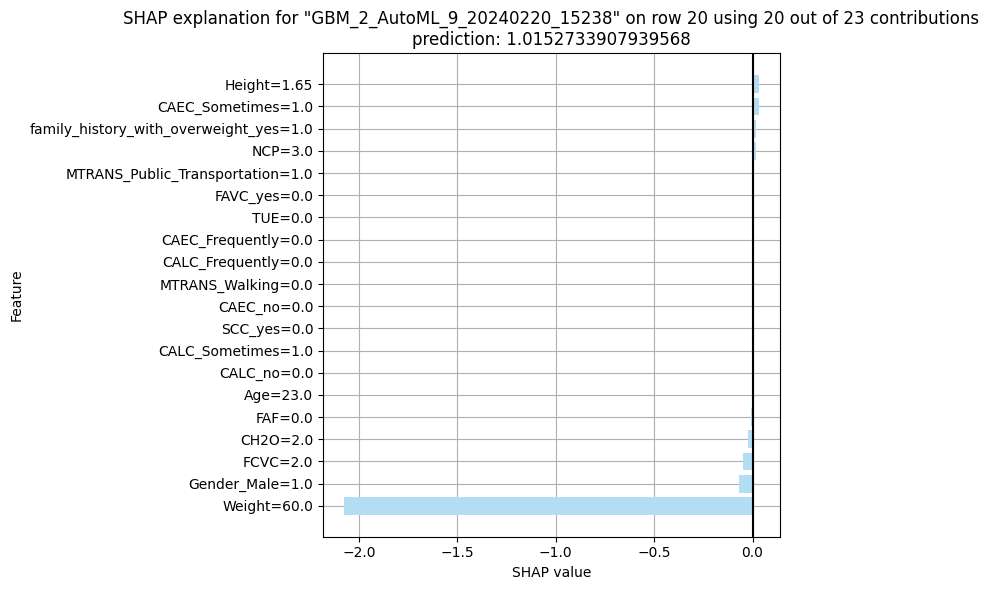

# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

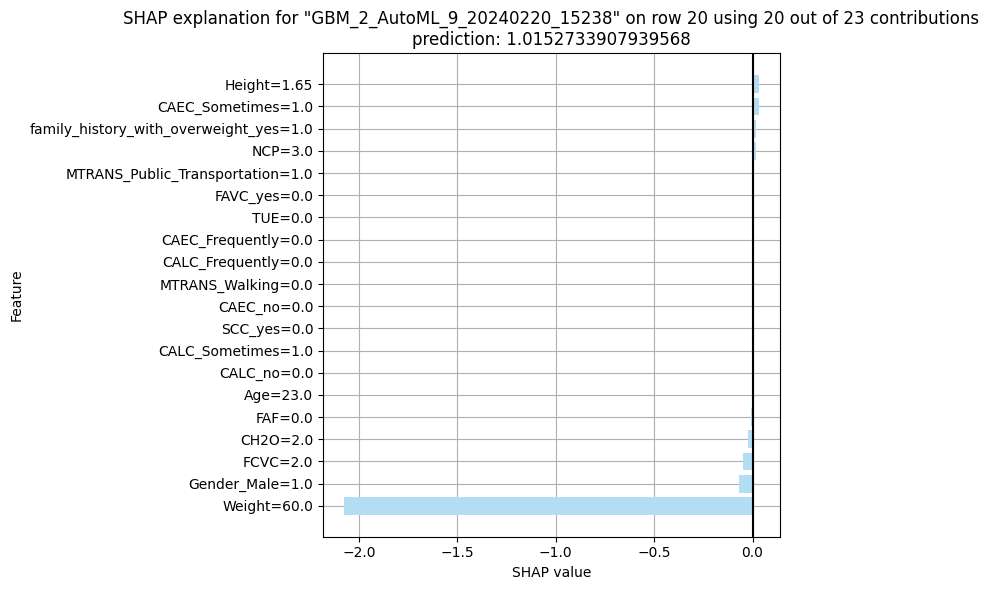

In [ ]:
aml.explain_row(frame = test, row_index = 20, figsize = (8,6), exclude_explanations = "leaderboard")


# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                                                    rmse        mse       mae        rmsle    mean_residual_deviance    training_time_ms    predict_time_per_row_ms  algo
------------------------------------------------------  --------  ---------  --------  -----------  ------------------------  ------------------  -------------------------  ---------------
StackedEnsemble_AllModels_1_AutoML_9_20240220_15238     0.197279  0.0389189  0.119119    0.0822578                 0.0389189                1214                   0.188272  StackedEnsemble
StackedEnsemble_BestOfFamily_1_AutoML_9_20240220_15238  0.20114   0.0404574  0.124343    0.0837186                 0.0404574                 905                   0.067723  StackedEnsemble
GBM_2_AutoML_9_20240220_15238                           0.203007  0.0412119  0.121392    0.0851684                 0.0412119                 589                   0.029144  GBM
GBM_4_AutoML_9_20240220_15238                           0.213234  0.0454689  0.128804    0.0948221                 0.0454689                 781                   0.028765  GBM
GBM_5_AutoML_9_20240220_15238                           0.222411  0.0494666  0.125264    0.0911588                 0.0494666                 499                   0.022621  GBM
GBM_3_AutoML_9_20240220_15238                           0.233245  0.0544032  0.13379     0.0937261                 0.0544032                 879                   0.029104  GBM
XGBoost_2_AutoML_9_20240220_15238                       0.234169  0.0548351  0.133915    0.095223                  0.0548351                3084                   0.010234  XGBoost
XGBoost_grid_1_AutoML_9_20240220_15238_model_2          0.260326  0.0677695  0.156043    0.105901                  0.0677695                 798                   0.014883  XGBoost
XGBoost_grid_1_AutoML_9_20240220_15238_model_1          0.271116  0.0735036  0.174022    0.108159                  0.0735036                 621                   0.009359  XGBoost
GBM_1_AutoML_9_20240220_15238                           0.271839  0.0738964  0.182246    0.127364                  0.0738964                1922                   0.043053  GBM
XGBoost_1_AutoML_9_20240220_15238                       0.280073  0.0784411  0.179145    0.115623                  0.0784411                2908                   0.012228  XGBoost
XGBoost_3_AutoML_9_20240220_15238                       0.288044  0.0829695  0.18087     0.127179                  0.0829695                 494                   0.00777   XGBoost
DRF_1_AutoML_9_20240220_15238                           0.29549   0.0873143  0.158861    0.121831                  0.0873143                 872                   0.014004  DRF
XRT_1_AutoML_9_20240220_15238                           0.304278  0.0925849  0.212188    0.141809                  0.0925849                 424                   0.011401  DRF
GBM_grid_1_AutoML_9_20240220_15238_model_1              0.319013  0.101769   0.213372    0.140492                  0.101769                 1095                   0.052895  GBM
GLM_1_AutoML_9_20240220_15238                           0.447354  0.200126   0.343708  nan                         0.200126                   41                   0.001296  GLM
DeepLearning_1_AutoML_9_20240220_15238                  0.452768  0.204999   0.306668    0.179182                  0.204999                  169                   0.003498  DeepLearning
[17 rows x 9 columns]

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

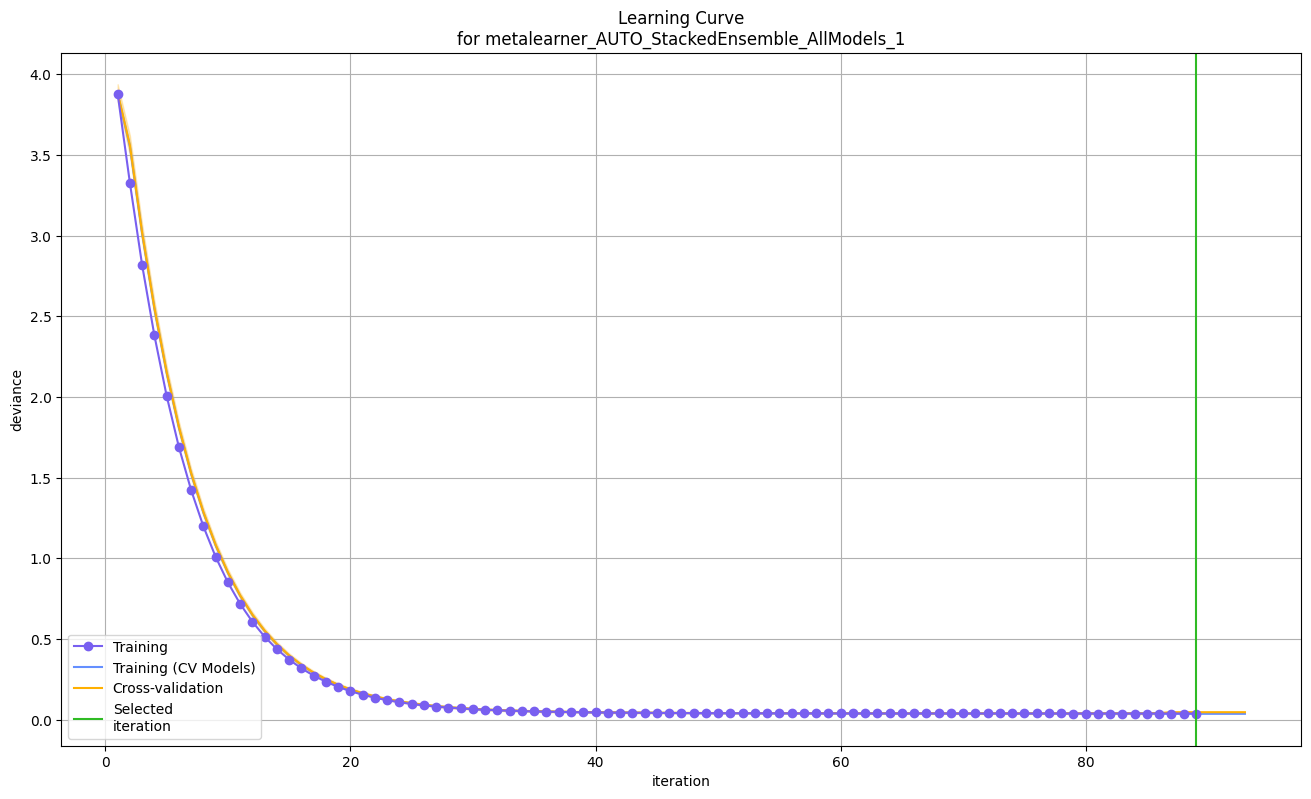

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

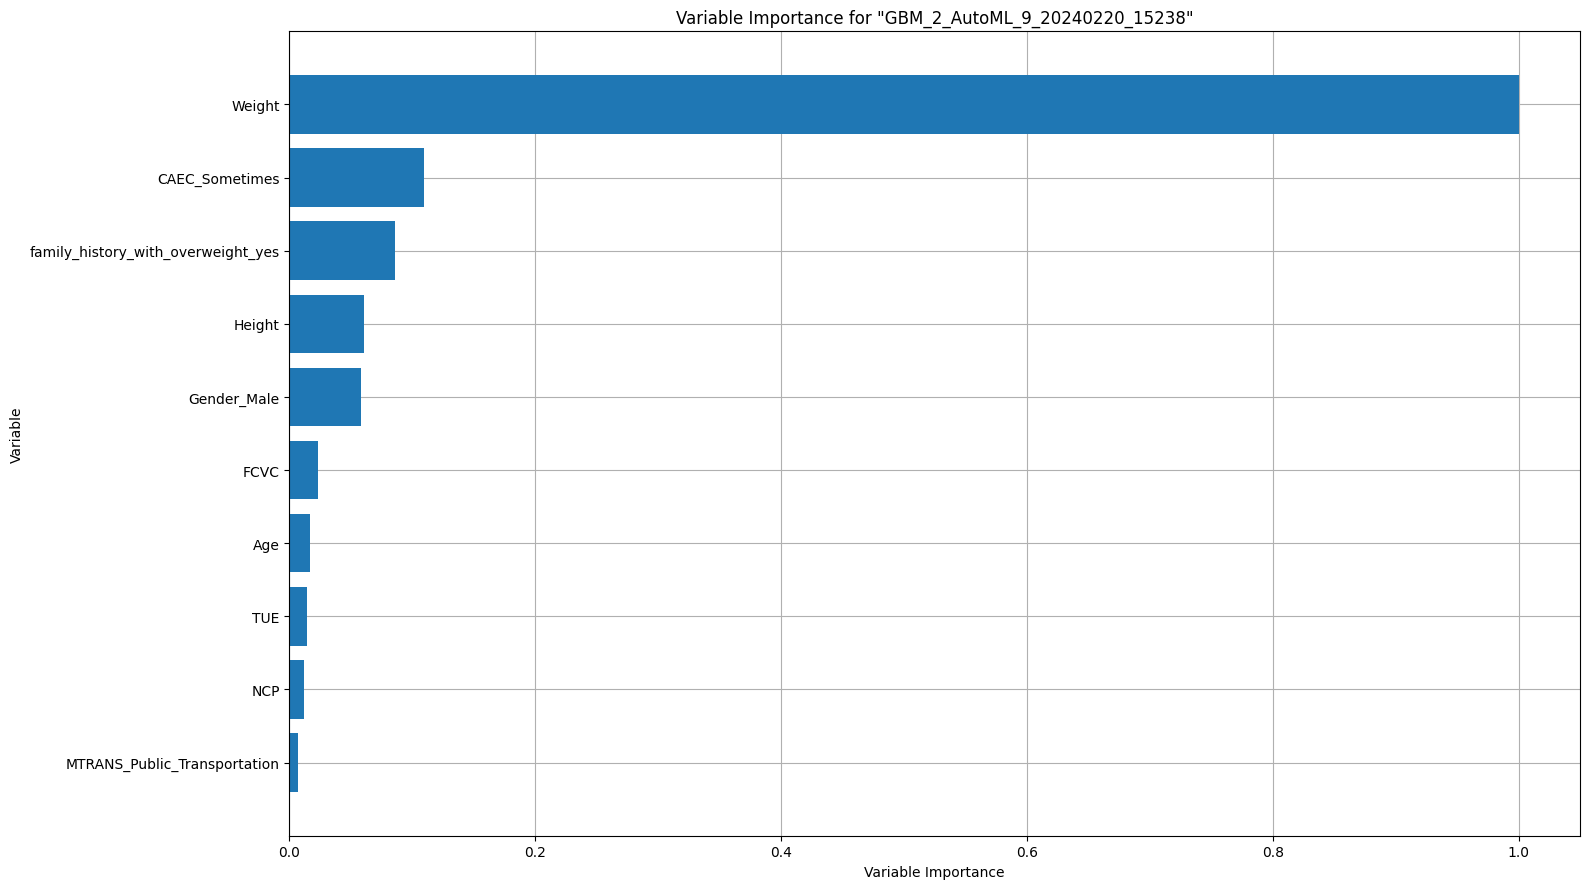

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

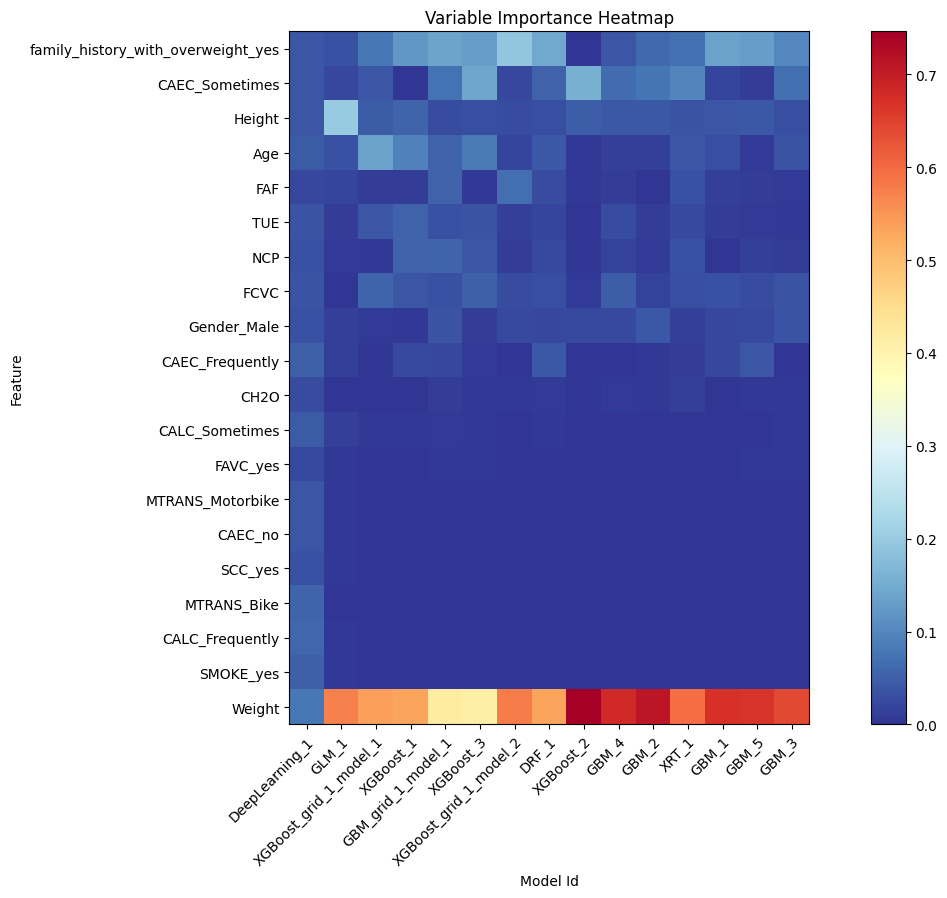

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

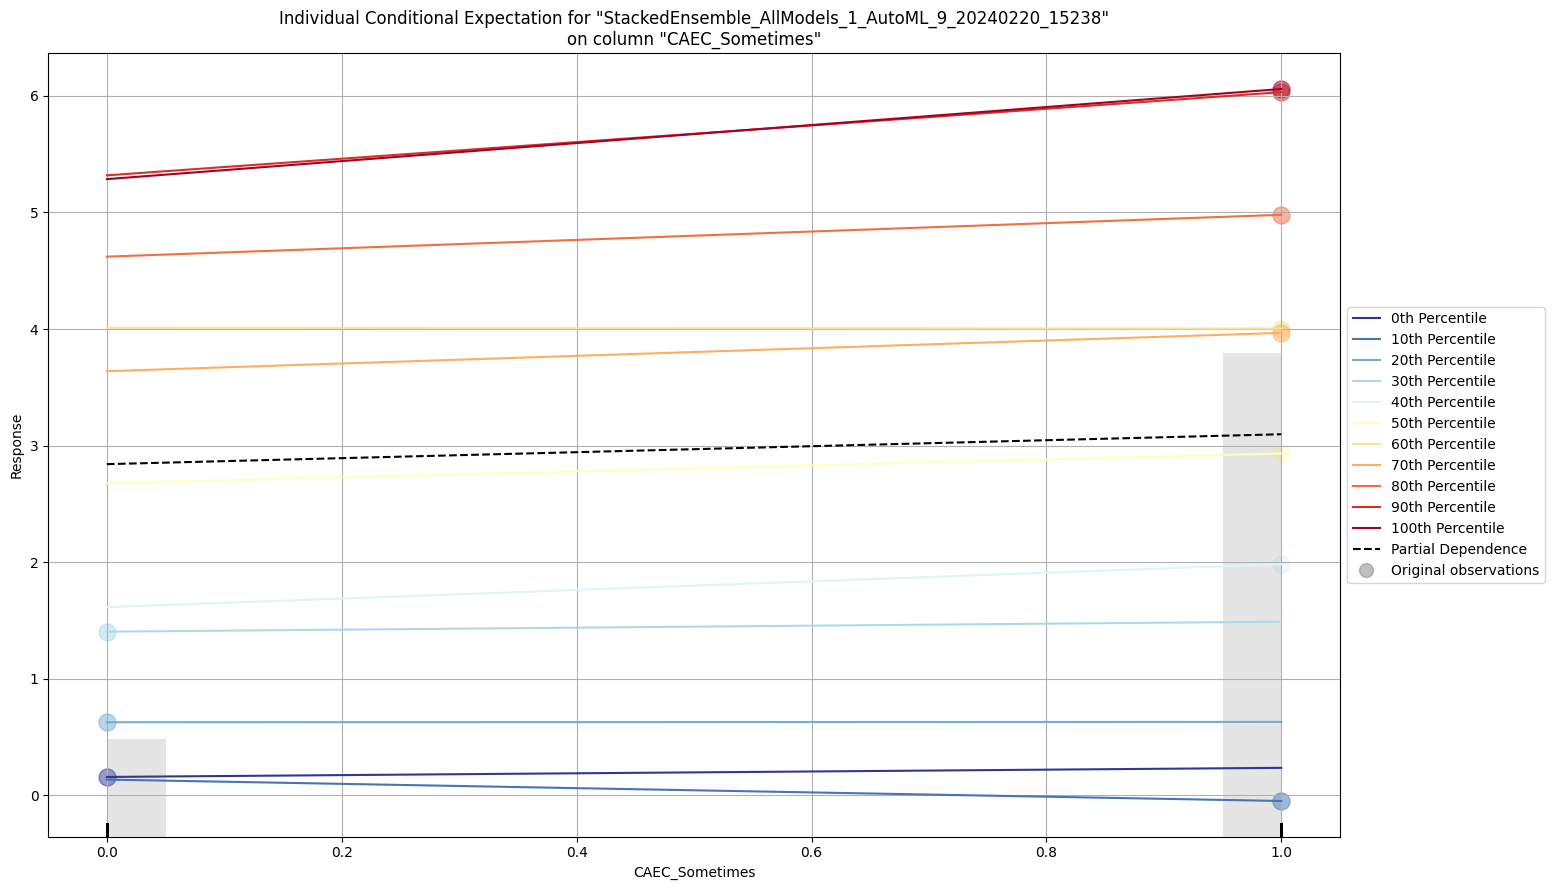

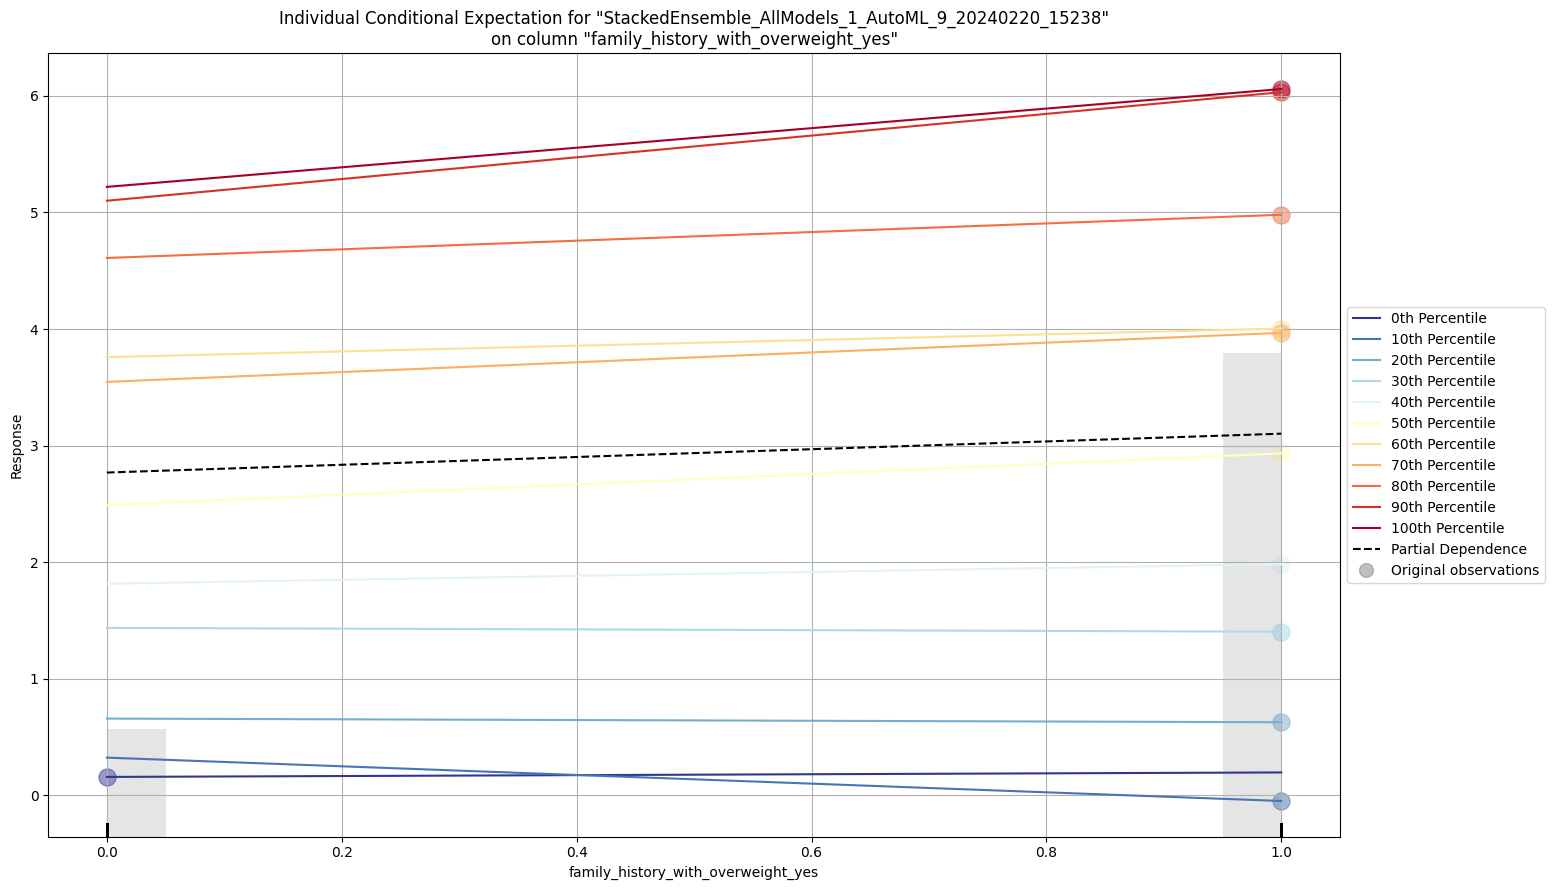

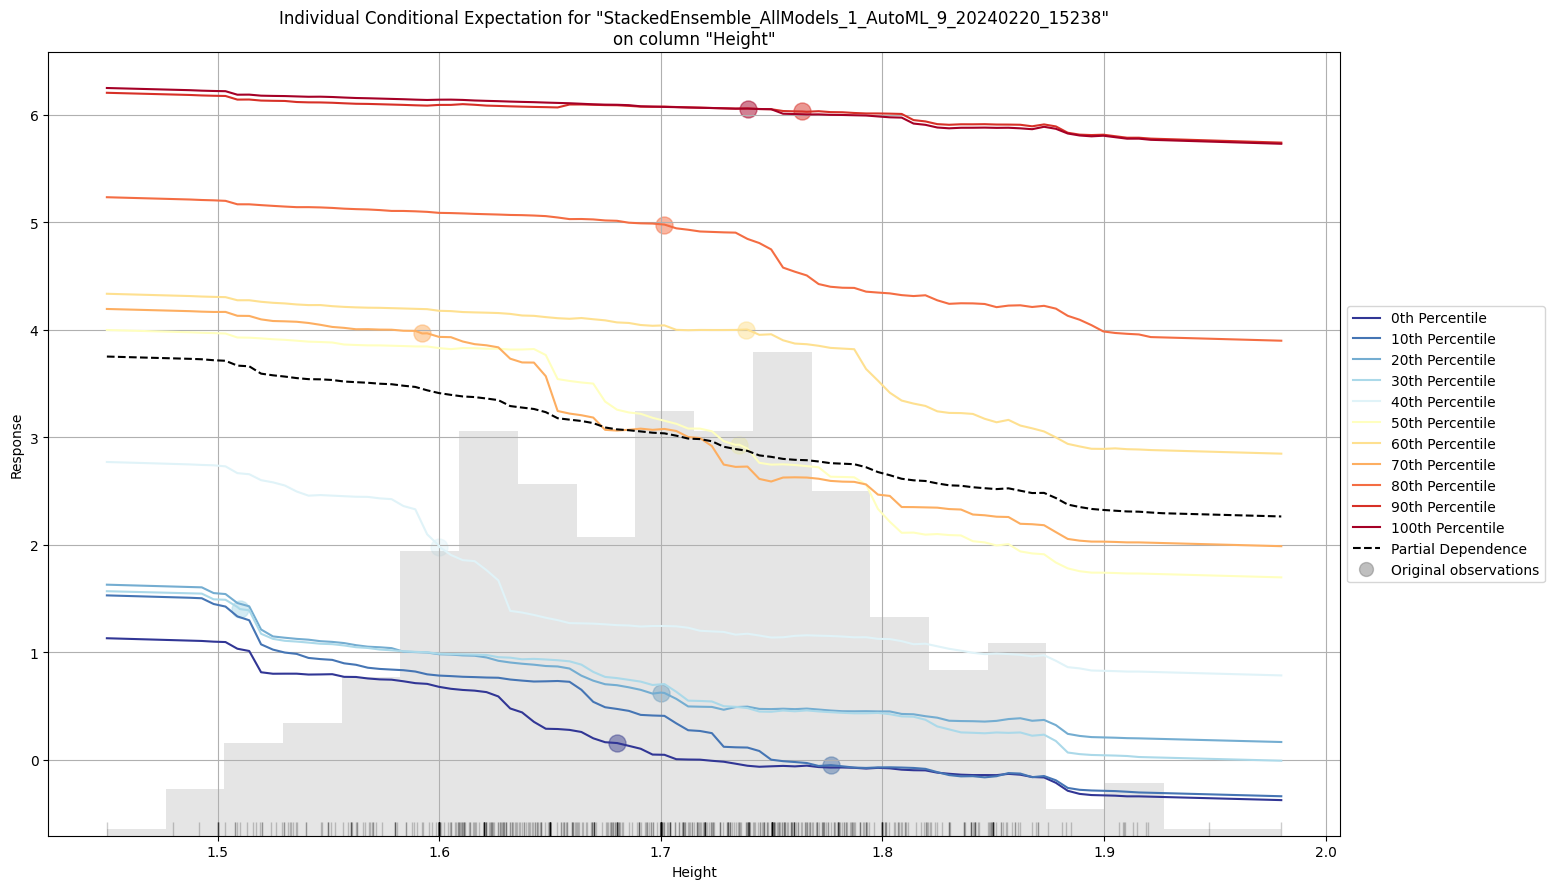

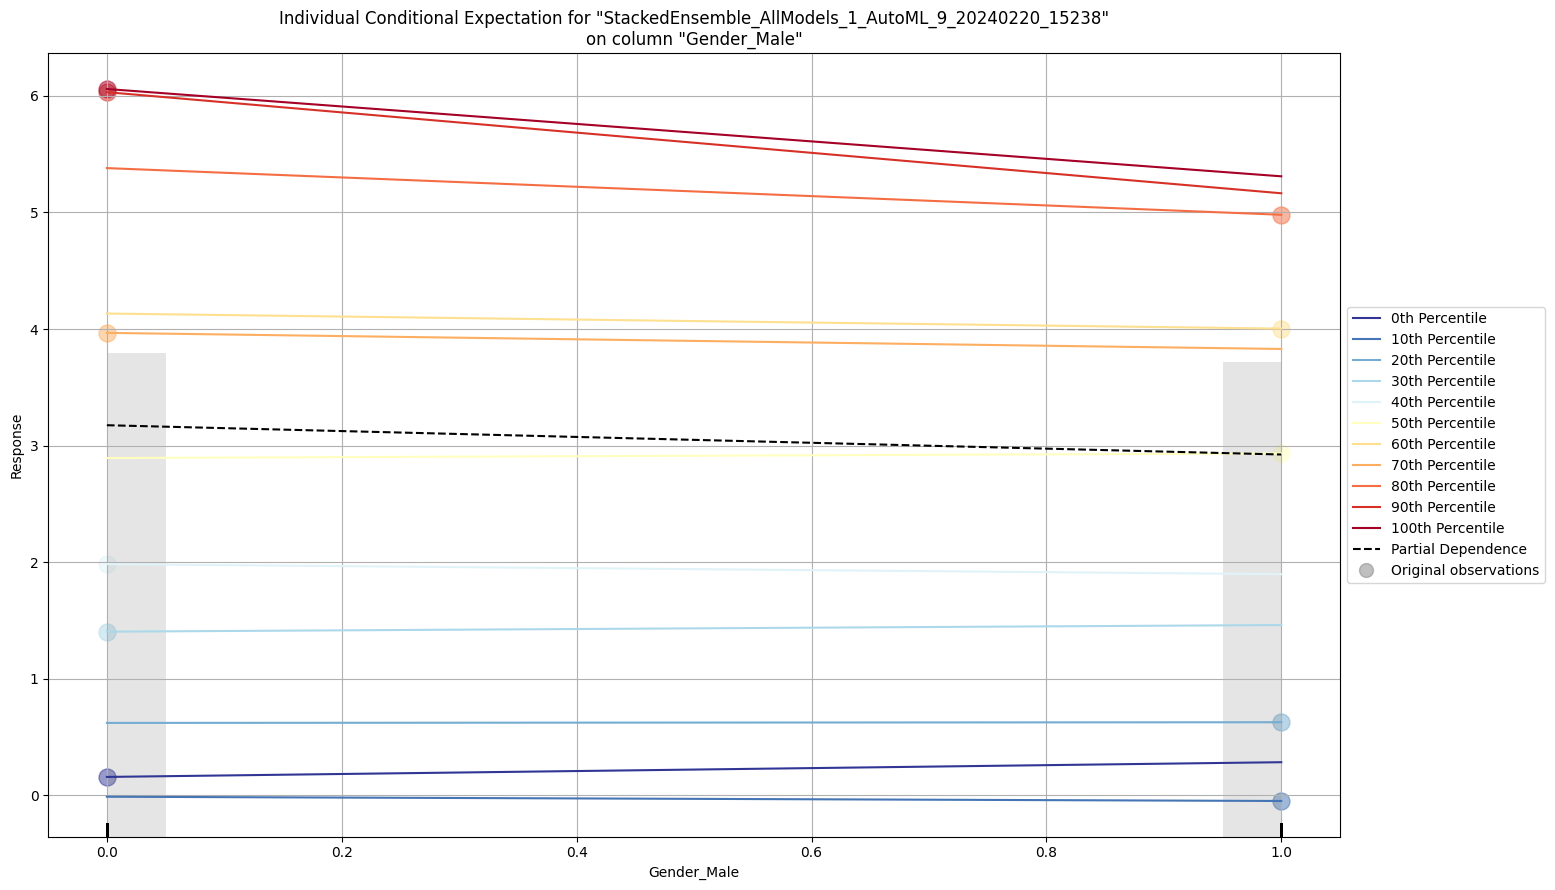

In [ ]:
explanation = aml.explain(test, exclude_explanations=['pdp', 'residual_analysis'])

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

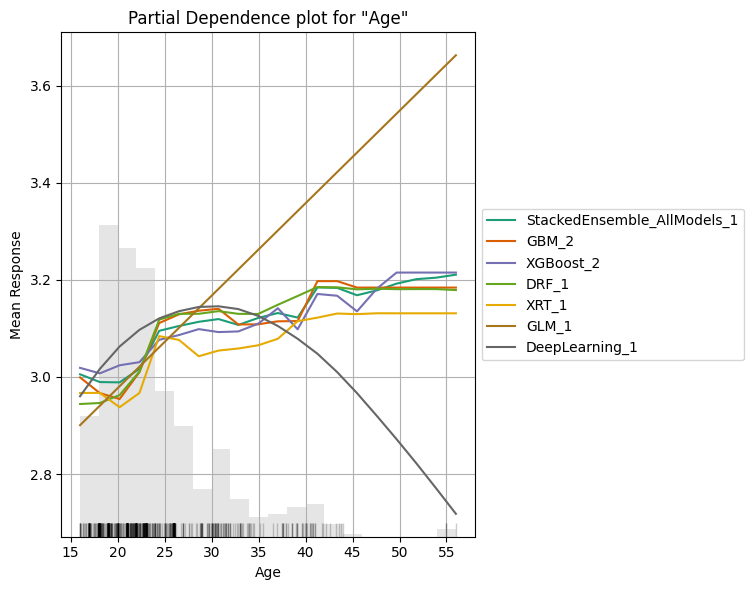

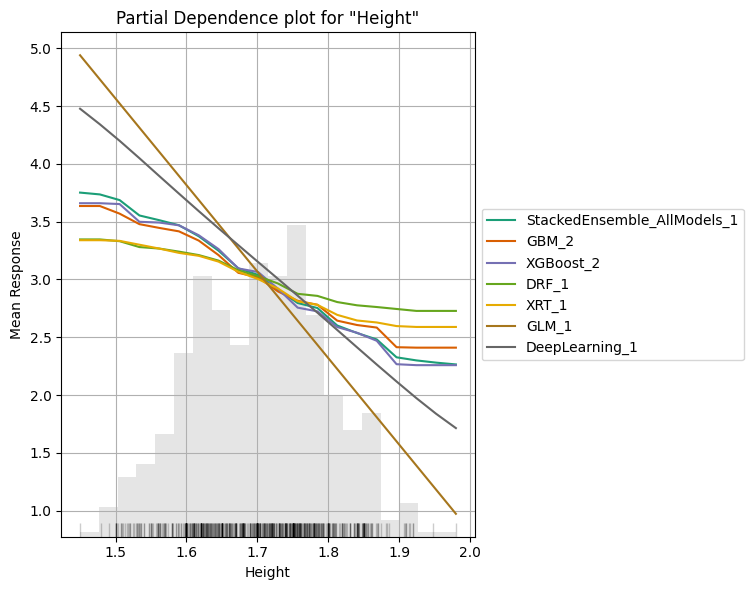

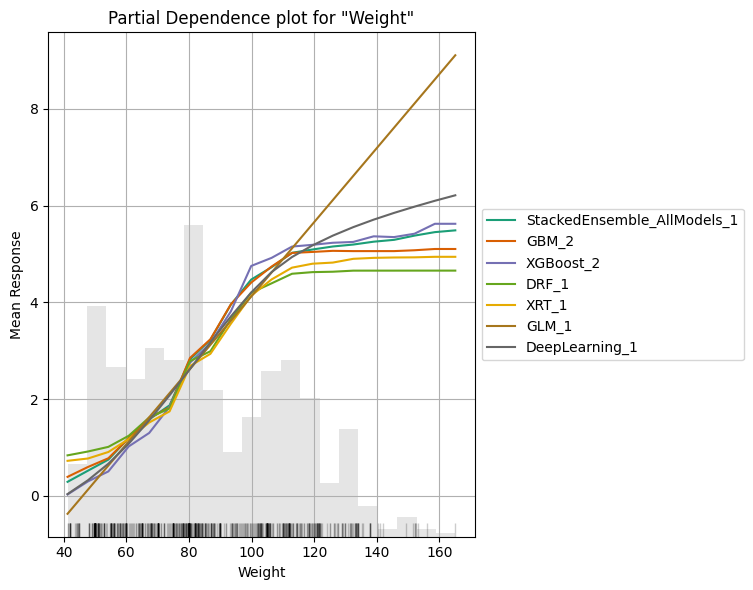

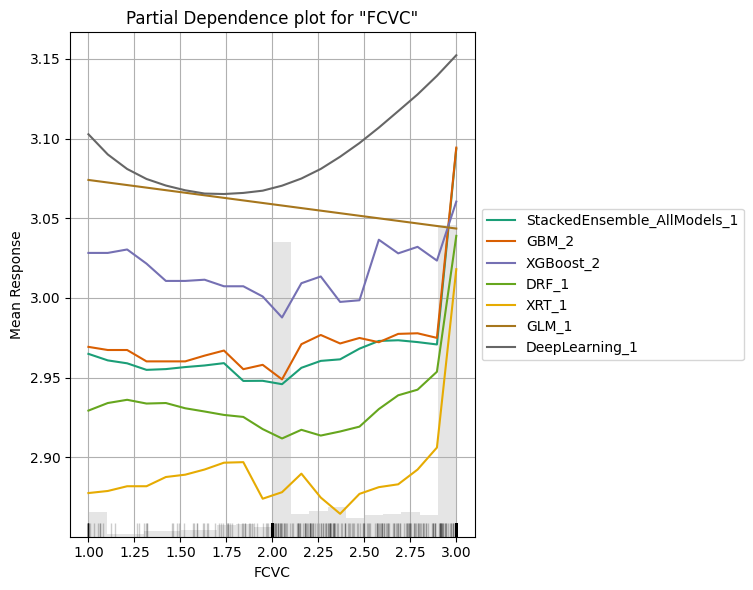

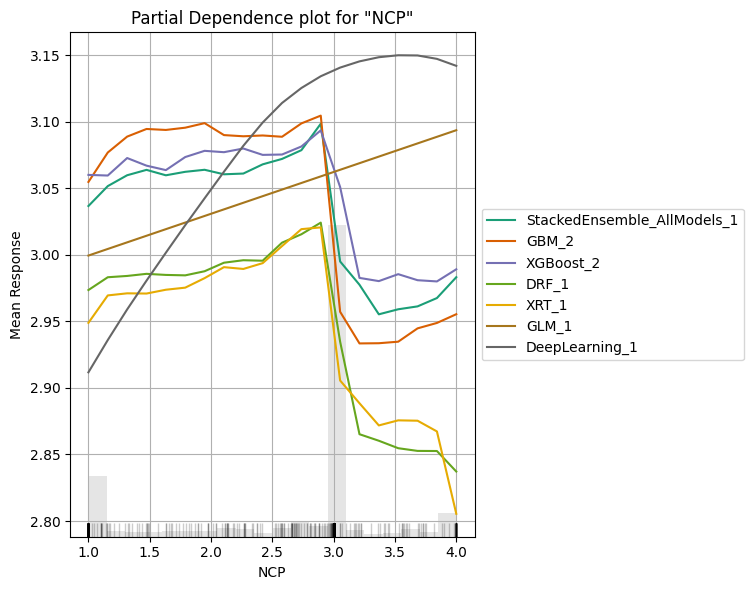

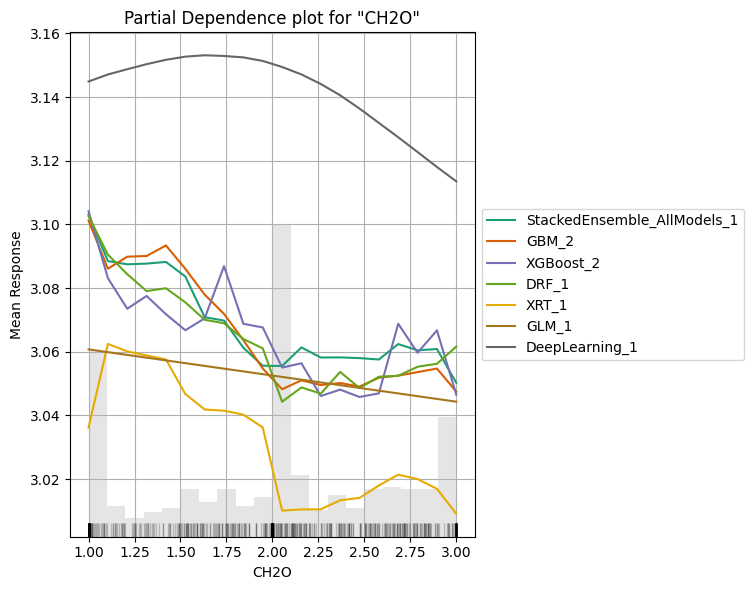

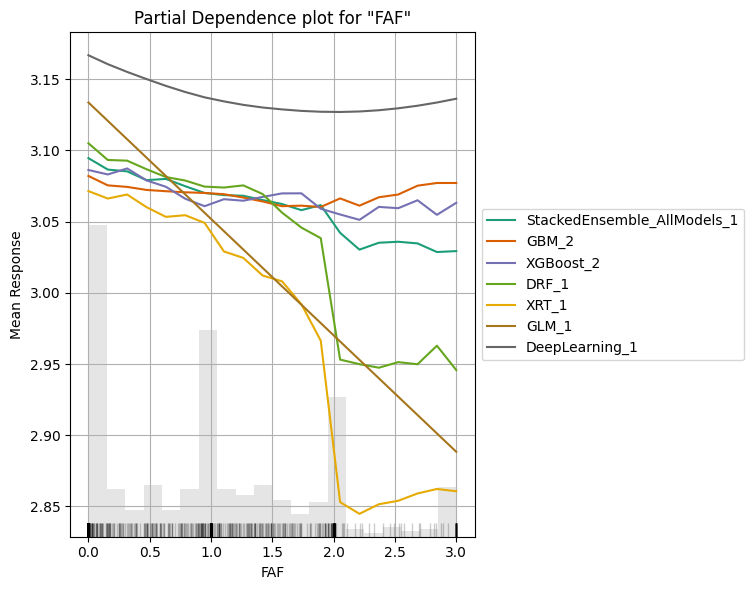

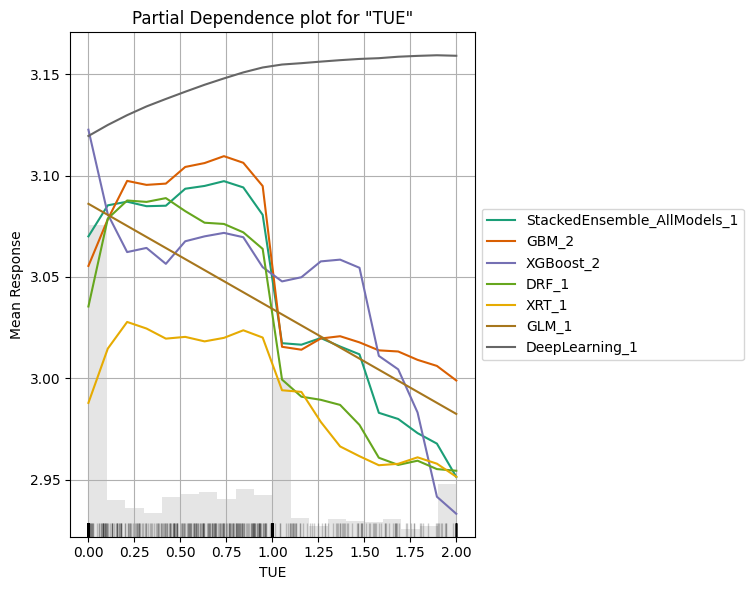

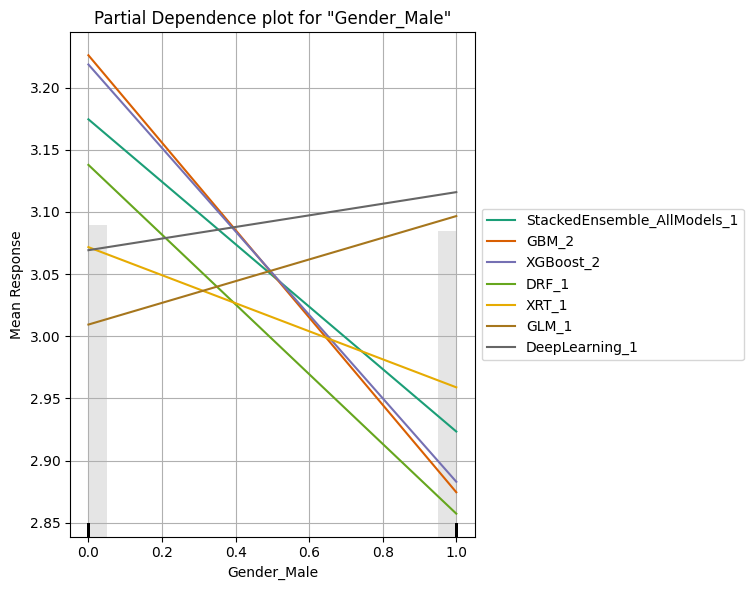

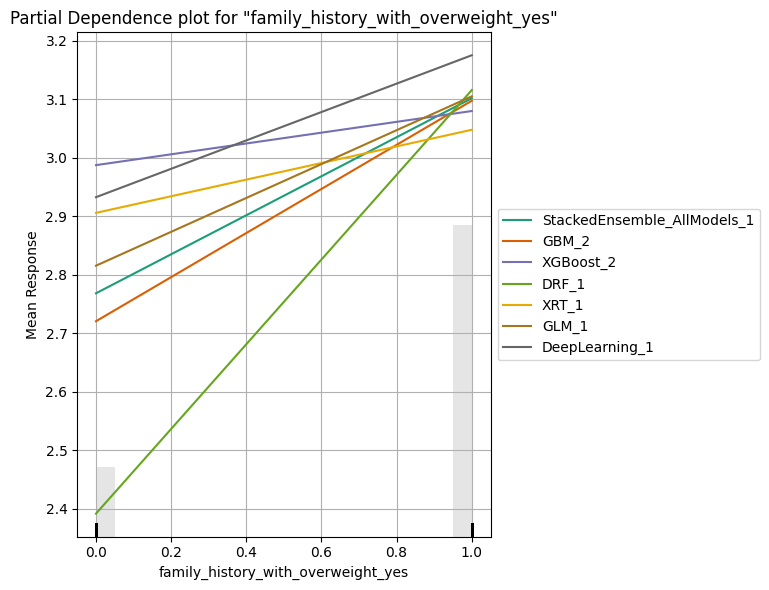

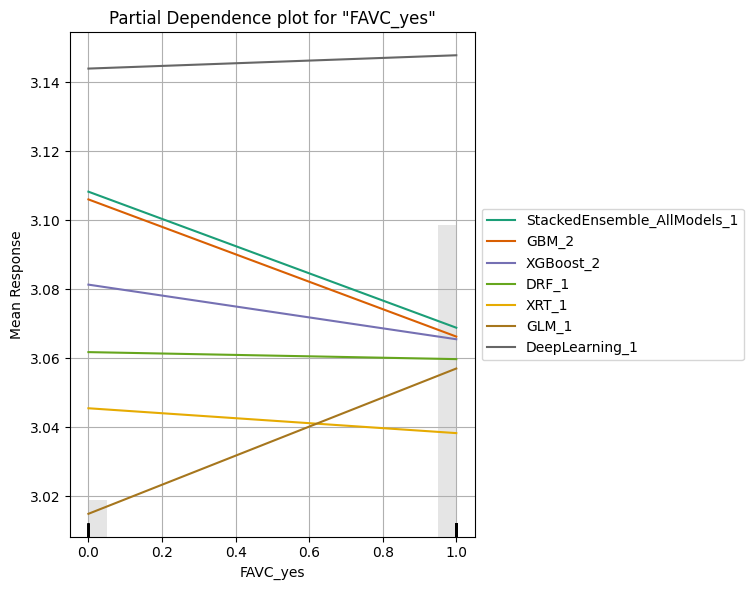

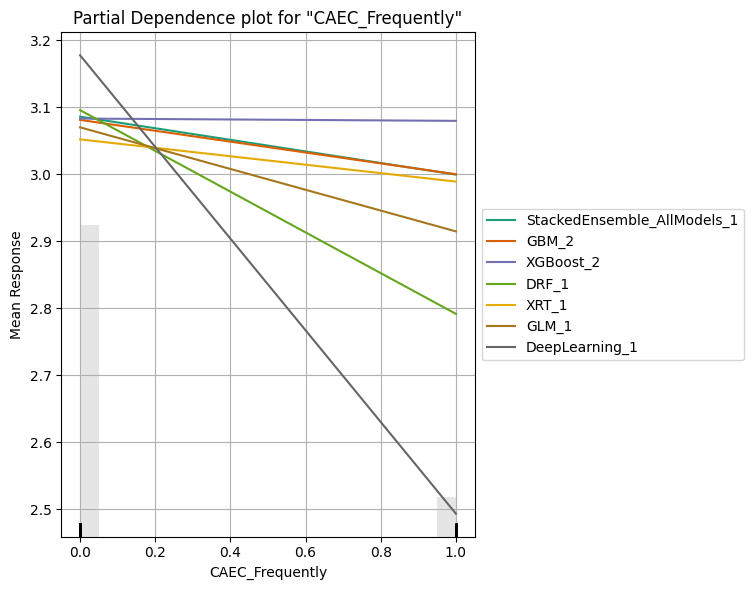

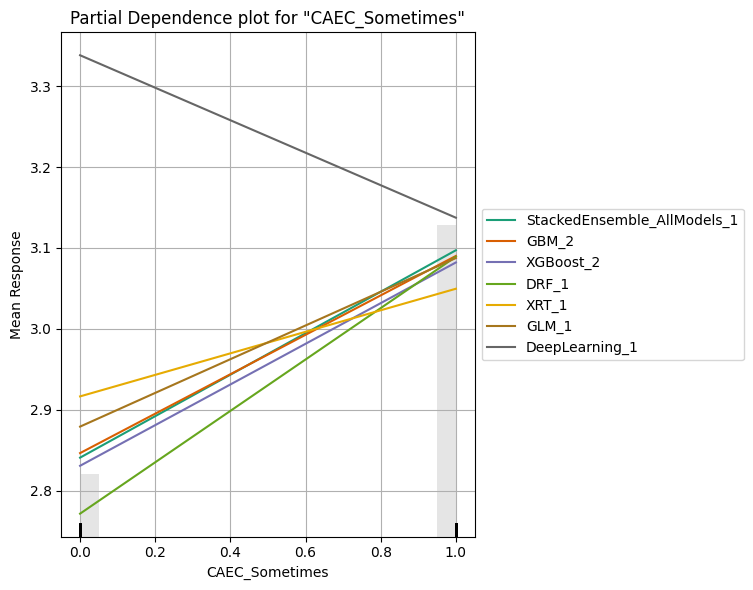

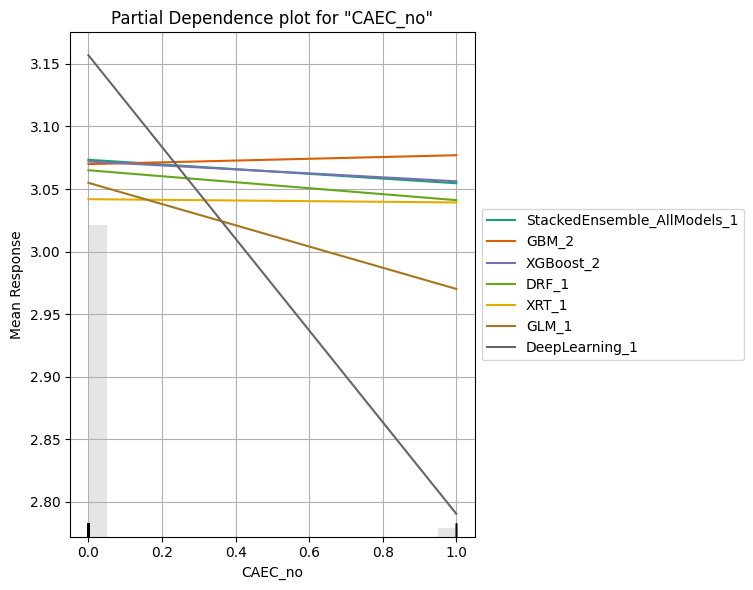

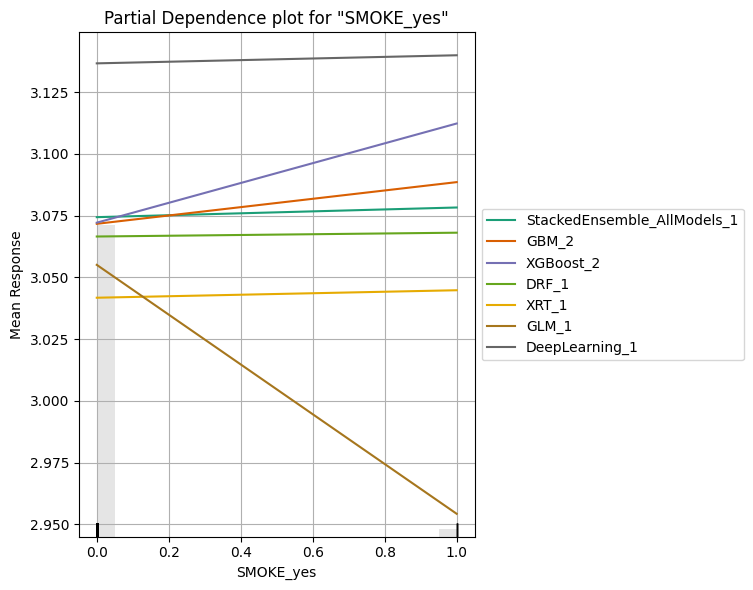

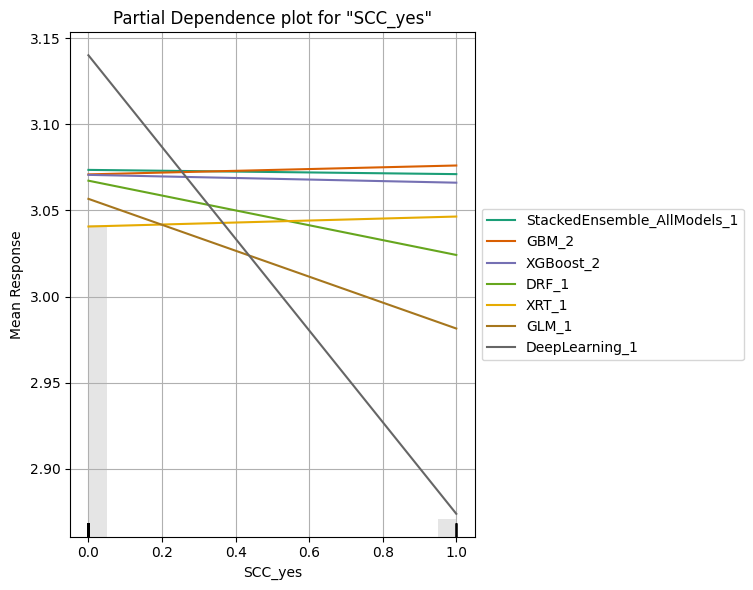

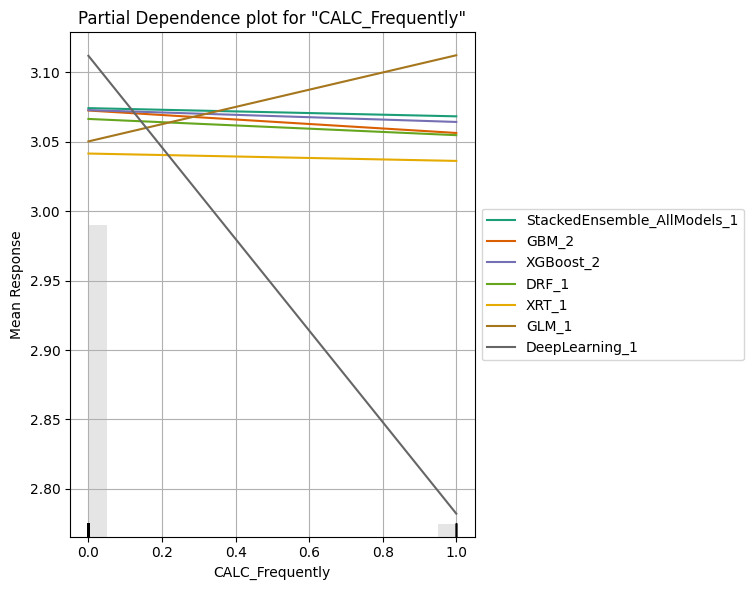

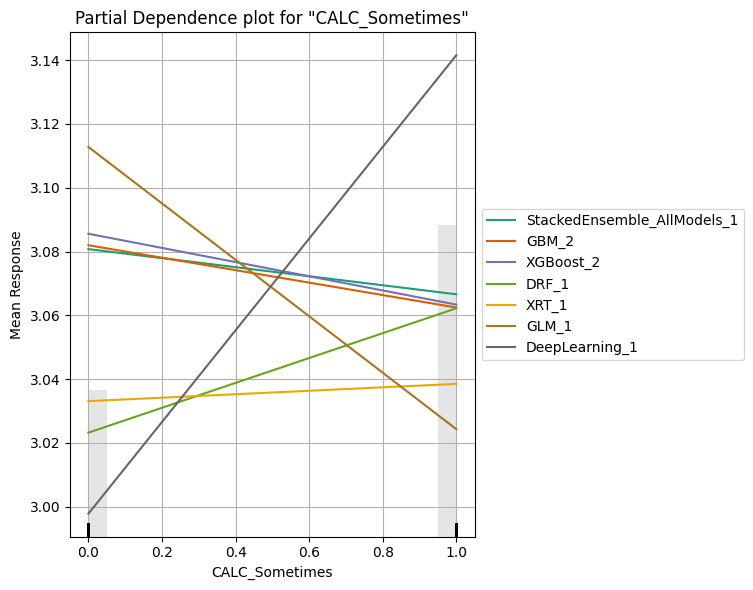

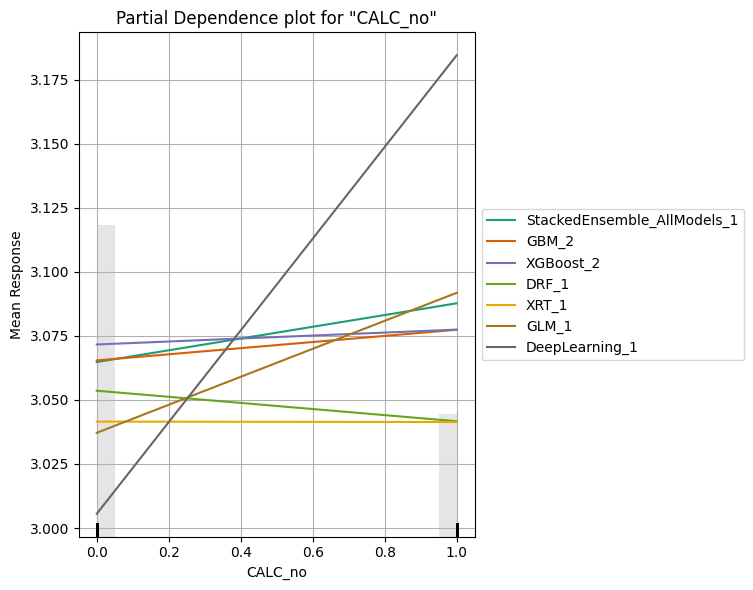

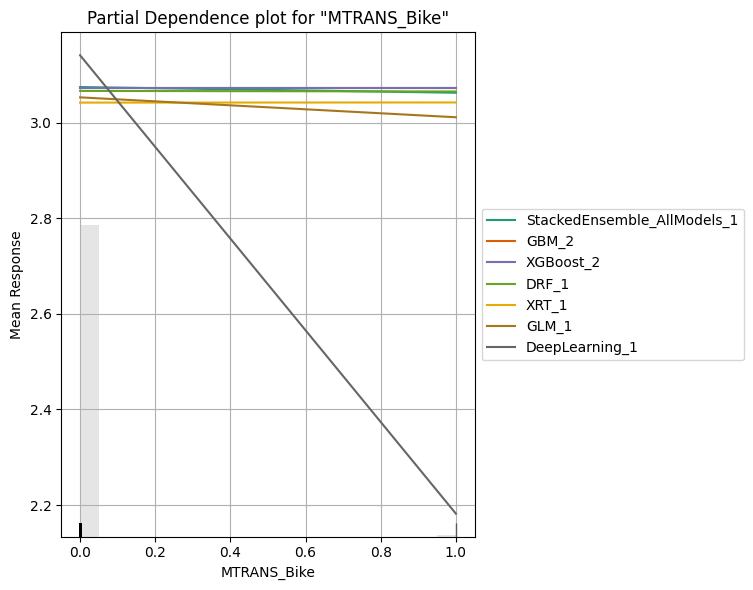

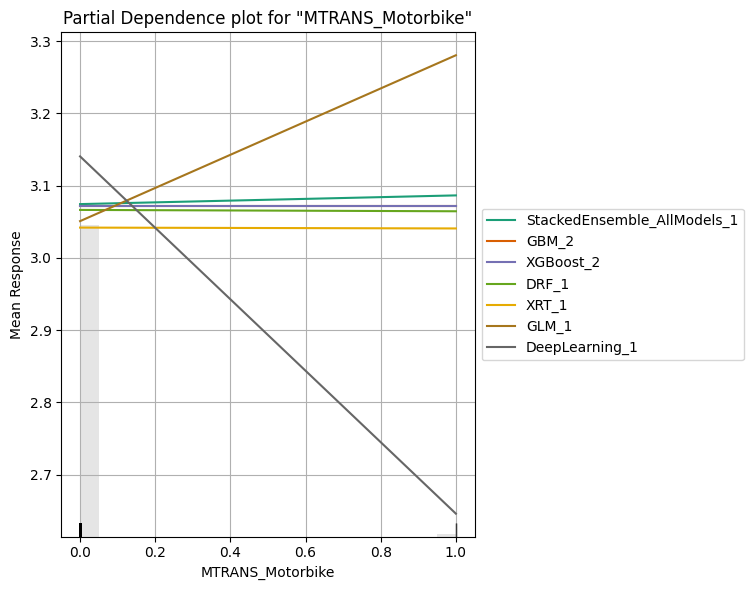

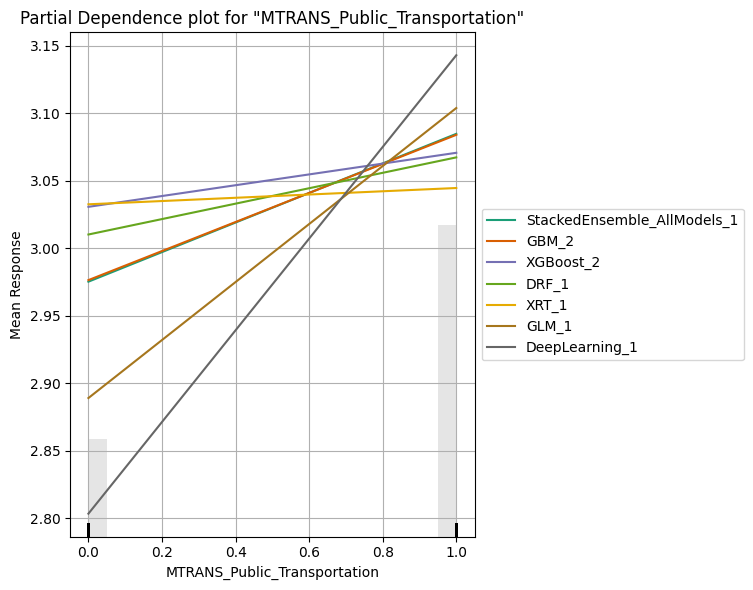

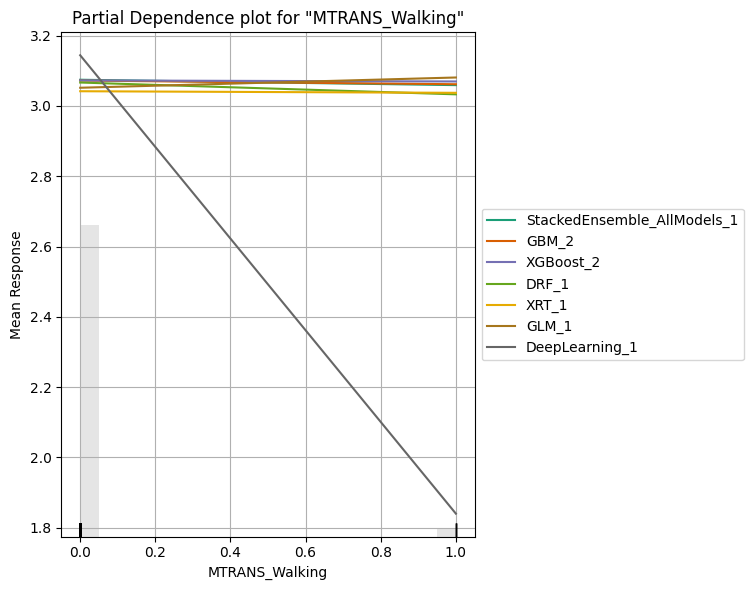

In [ ]:
explain_model = aml.explain(frame = test, figsize = (8,6),include_explanations=['pdp'])

#Answers

Answer the following questions for all of the models:

* Is the relationship significant?



> The best model, a stacked ensemble, demonstrates a highly significant relationship between predictors and the target, evidenced by an R-squared value of 0.9904, indicating that 99.04% of the variance in the target variable is explained by the model. The low Mean Squared Error (MSE) of 0.039 and Root Mean Squared Error (RMSE) of 0.197 further affirm the model's accuracy. These metrics collectively signify the model's strong predictive performance and its effectiveness



* Are any model assumptions violated?


> No,Based on the Stacked Ensemble model, it does not appear that the assumptions typically associated with individual models are being violated. The ensemble approach combines multiple models to make a final prediction, which inherently reduces the risk of violating the assumptions of any single model.




* Is there any multicollinearity in the model?


> The VIF analysis indicates significant multicollinearity within the dataset, notably within the "CALC" variables and also among "Age", "Height", and "Weight", albeit to a lesser extent. The "Age", "Height", and "Weight" variables exhibit moderate VIF scores, suggesting mild multicollinearity that could be considered acceptable in this context. To improve the model's accuracy and reduce potential bias, it might be beneficial to address the pronounced multicollinearity found in the "CALC" variables by either removing, combining them, or applying dimensionality reduction techniques, while closely monitoring the impact on the model.



* In the multivariate models are predictor variables independent of all the other predictor variables?


> The correlation matrix shows that the predictor variables 'Age', 'Height', and 'Weight' have some degree of multicollinearity, with 'Height' and 'Weight' exhibiting a particularly strong correlation. However, these correlations are not so high as to warrant immediate concern, except perhaps for 'Height' and 'Weight'. In predictive modeling, such multicollinearity is often acceptable, especially when the model can handle it, like in tree-based methods or regularized regression included within an ensemble approach.



* In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.


> The SHAP summary and variable importance and other analysis such as pdp suggest that "Weight" is the most significant predictor variable, followed by "Height" and "Gender_Male". These variables have the most substantial impact on the model's predictions. In contrast, variables like "SCC_yes" and "CAEC_no" appear to be less important. For model refinement, you could consider excluding the less important variables to simplify the model and potentially improve its performance.



* Does the model make sense?


> The model's decision-making process, as revealed by the SHAP summary and variable importance plots, aligns with domain knowledge and intuition, suggesting that the model makes sense. The most significant predictors—weight, height, and gender—are well-known factors associated with obesity, which is the target variable. The model's reliance on these predictors is consistent with medical understanding and expectations, indicating that the model's logic is sound and its predictions are based on meaningful data relationships.



* Does regularization help?


> Based on the AutoML leaderboard results, the Stacked Ensemble model, which incorporates regularization through its GLM metalearner, achieved the best performance, suggesting that regularization contributed positively to the ensemble's predictive accuracy.Therefore it did help.



* Which independent variables are significant?


>  Based on the SHAP summary plot,heatmap and variable importance plotthe most significant independent variables affecting the model's predictions are:
Weight: It has the highest impact on the model's prediction, indicating a strong positive relationship with the target variable.
Height: This is the second most important predictor, also showing a strong relationship.
Gender_Male: Being male has a notable impact on the model's prediction, suggesting gender differences are important.
Family_history_with_overweight_yes: This indicates that having a family history of being overweight is a significant predictor.
CAEC_Sometimes: Frequency of high-calorie food consumption labeled as 'sometimes' appears to be an important variable.






* Which hyperparameters are important?



> For the models generated in the AutoML process, the most important hyperparameters that significantly affect model performance include:


>Number of trees (ntrees): Dictates the complexity of the ensemble models like GBM and XGBoost. More trees can capture more complex patterns but may lead to overfitting. Maximum depth of trees (max_depth): Controls how deep the trees can grow and thus affects the model's ability to model interactions.
Learning rate (learn_rate): Particularly important in GBM and XGBoost models, it determines the step size at each iteration while moving toward a minimum of a loss function.
Sample rate (sample_rate): Used in GBM and XGBoost to specify the fraction of data to be used for learning the model. This is akin to the bagging approach in Random Forests.
Column sample rate (col_sample_rate): Specifies the fraction of features to use for each tree in GBM and XGBoost, introducing feature-wise randomness.
Regularization (alpha and lambda in GLM): These are crucial for controlling model complexity and preventing overfitting by penalizing large coefficients.
Hidden layers configuration in Deep Learning: The number and size of hidden layers are key to the model's ability to capture complex relationships.

* Coding professionalism? Yes






In [ ]:
# Get the top model from the leaderboard
top_model = aml.leader
# List all base models of the stacked ensemble
base_models = top_model.metalearner().coef_norm()
print("Base Models:", base_models)
# List of model IDs from your output excluding 'Intercept' and models with a coefficient of 0.0
model_ids = [model_id for model_id, coef in base_models.items() if coef != 0.0 and model_id != 'Intercept']


for model_id in model_ids:
    # Retrieve each model by its ID
    model = h2o.get_model(model_id)
    # Print the model type and its hyperparameters
    print(f"Model ID: {model_id}")
    print("Model Type:", model.algo)
    print("Hyperparameters:", model.params)
    print("\n---\n")

Base Models: {'Intercept': 3.1277591973244108, 'GBM_2_AutoML_9_20240220_15238': 0.5963806032496413, 'GBM_4_AutoML_9_20240220_15238': 0.5637112367839212, 'GBM_5_AutoML_9_20240220_15238': 0.38796392404218843, 'GBM_3_AutoML_9_20240220_15238': 0.0, 'XGBoost_2_AutoML_9_20240220_15238': 0.2671217640693284, 'GBM_1_AutoML_9_20240220_15238': 0.0, 'DRF_1_AutoML_9_20240220_15238': 3.4313693453018452e-06, 'XRT_1_AutoML_9_20240220_15238': 4.262898278349791e-06, 'XGBoost_3_AutoML_9_20240220_15238': 4.97252168017378e-06, 'GBM_grid_1_AutoML_9_20240220_15238_model_1': 3.167658534591848e-06, 'XGBoost_grid_1_AutoML_9_20240220_15238_model_2': 0.0, 'XGBoost_1_AutoML_9_20240220_15238': 0.0, 'GLM_1_AutoML_9_20240220_15238': 0.13481425464550598, 'XGBoost_grid_1_AutoML_9_20240220_15238_model_1': 2.58386599428339e-06, 'DeepLearning_1_AutoML_9_20240220_15238': 0.01481203320817588}
Model ID: GBM_2_AutoML_9_20240220_15238
Model Type: gbm
Hyperparameters: {'model_id': {'default': None, 'actual': {'__meta': {'schema

#Conclusion


The analysis leveraging AutoML and H2O.ai highlighted the efficacy of automated machine learning in predictive modeling. The stacked ensemble model, identified as the best performer with a significant R-squared value of 0.9904, exemplifies the strong predictive capability of AutoML-generated models. Key predictors identified—such as "Weight," "Height," and "Gender_Male"—underscore the model's reliance on meaningful variables, aligning with domain knowledge.

Multicollinearity analysis revealed areas for optimization, notably among the "CALC" variables, suggesting a path forward for model refinement. The use of regularization techniques within the ensemble model significantly contributed to its predictive accuracy, demonstrating the value of these methods in enhancing model performance.

This project showcases AutoML's potential to simplify complex analytical processes, enabling robust predictive modeling with minimal manual intervention. Future efforts may focus on exploring advanced feature engineering and alternative modeling strategies to further improve accuracy.

# References



- **Professor Notebook**
  - https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/AutoML/AutoML_Basics_InnerWorkings_Interpretations.ipynb


- **YouTube Tutorial:**
  - [AutoML Tutorial on YouTube](https://www.youtube.com/watch?v=91QljBnvM7s)

- **H2O AutoML Documentation:**
  - [H2O AutoML Official Documentation](http://docs.h2o.ai/h2o/latest-stable/h2o-docs/automl.html)

- **Model Evaluation Metrics:**
  - [Evaluation Metrics for Machine Learning Models](https://scikit-learn.org/stable/modules/model_evaluation.html) (Note: While this link leads to scikit-learn's documentation, it provides a good overview of various metrics that might be relevant for evaluating models in H2O as well.)

- **GitHub Reference for Assignment:**
  - [AutoML Basics, Inner Workings & Interpretations on GitHub](https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/AutoML/AutoML_Basics_InnerWorkings_Interpretations.ipynb)

- **Dataset:**
  - [Dataset on Kaggle](https://www.kaggle.com/datasets/aravindpcoder/obesity-or-cvd-risk-classifyregressorcluster)


# Licence


**MIT License**

Copyright (c) 2024 nikhilgodalla

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.